
## Assignment 3 Block 3 Complex systems in Bioinformatics Se24
Petko Antonov, Hyunchang Oh

### Task 1

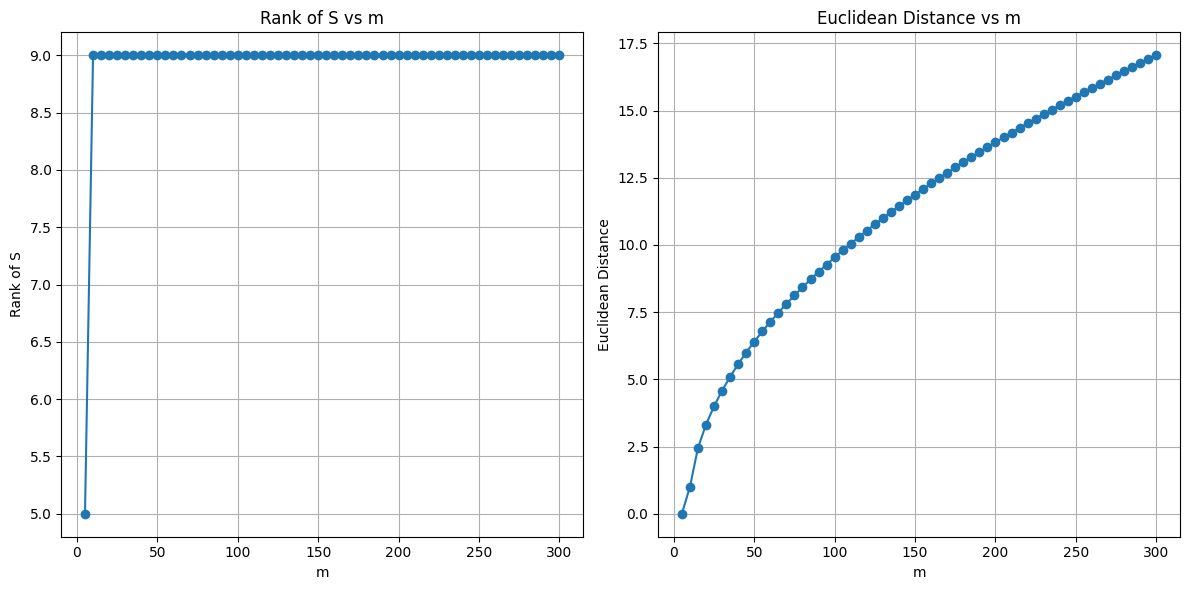

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the range for m
m_values = list(range(5, 301, 5))
n = 10  # Number of rows

# Initialize lists to store results
ranks = []
euclidean_distances = []

for m in m_values:
    # Generate matrix X with m columns and n rows, sampled from a Gaussian distribution
    X = np.abs(np.random.randn(n, m))  # Entries are non-negative
    
    # Center the matrix X
    X_centered = X - X.mean(axis=0) 
    
    # Calculate the covariance matrix S
    S = np.dot(X_centered.T, X_centered) / (n - 1)
    
    # Calculate the rank of S
    rank_S = np.linalg.matrix_rank(S)
    ranks.append(rank_S)
    
    # Perform SVD
    U, W, VT = np.linalg.svd(S)
    
    # Calculate the pseudoinverse of S
    # Create the diagonal matrix of singular values
    W_inv = np.zeros((m, m))
    for i in range(len(W)):
        if W[i] > 1e-10:  # Tolerance to avoid division by zero
            W_inv[i, i] = 1.0 / W[i]
    
    # Calculate the pseudoinverse using the formula
    S_plus = np.dot(np.dot(VT.T, W_inv), U.T)
    
    # Calculate the product S * S+
    I_approx = np.dot(S, S_plus)
    
    # Calculate the identity matrix of rank m
    I_m = np.eye(m)
    
    # Calculate the Euclidean distance between I_approx and I_m
    euclidean_distance = np.linalg.norm(I_approx - I_m)
    euclidean_distances.append(euclidean_distance)

# Plot the rank of S vs m
plt.figure(figsize=(12, 6))

# Subplot for the rank of S vs m
plt.subplot(1, 2, 1)
plt.plot(m_values, ranks, marker='o', linestyle='-')
plt.xlabel('m')
plt.ylabel('Rank of S')
plt.title('Rank of S vs m')
plt.grid(True)

# Subplot for the Euclidean distance vs m
plt.subplot(1, 2, 2)
plt.plot(m_values, euclidean_distances, marker='o', linestyle='-')
plt.xlabel('m')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance vs m')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()



Interpretation: It's amazing..